# 深層学習の実装

- ref: https://keras.io/examples/vision/mnist_convnet/

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

score = model.evaluate(x_test[:256], y_test[:256], verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________

In [2]:
x_train.shape

(60000, 28, 28, 1)

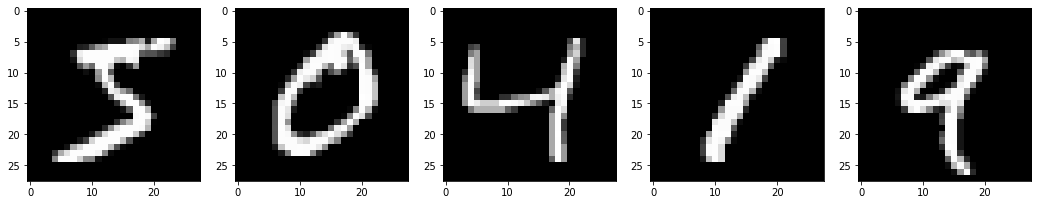

In [3]:
import matplotlib.pyplot as plt

N=5
plt.figure(figsize=(18,18))
for i in range(N):
  plt.subplot(1,N,i+1); plt.imshow(x_train[i].squeeze(), "gray")
plt.show()

In [4]:
pred = model.predict(x_train[:N], batch_size=1)
print(pred.shape)
pred

(5, 10)


array([[5.68418201e-09, 1.07455715e-08, 5.08743653e-07, 6.46705329e-02,
        1.04390940e-11, 9.35295582e-01, 3.58306829e-09, 2.47241758e-07,
        2.79988017e-05, 5.13056875e-06],
       [9.99992728e-01, 4.99710412e-11, 1.50881226e-06, 9.87778193e-10,
        5.56812985e-10, 1.03750331e-09, 5.23919653e-06, 7.28387850e-10,
        2.13263277e-07, 3.22097179e-07],
       [1.29772484e-10, 2.29056168e-05, 1.82205372e-06, 4.46429993e-07,
        9.99863982e-01, 1.24066119e-07, 2.22968826e-08, 2.90996413e-05,
        6.02194234e-07, 8.10981874e-05],
       [8.63986406e-06, 9.99005497e-01, 1.05627252e-04, 1.48778406e-06,
        4.60155337e-04, 3.23267273e-07, 3.30932417e-05, 2.03870179e-04,
        1.80032366e-04, 1.30605508e-06],
       [3.65465667e-07, 2.77894543e-07, 1.21722246e-06, 3.34554934e-05,
        9.89796477e-04, 1.51176073e-06, 1.50899080e-08, 2.65884359e-04,
        2.27410905e-03, 9.96433377e-01]], dtype=float32)

In [5]:
pred = np.argmax(pred, axis=1)
print(pred)

[5 0 4 1 9]
